In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
from ucimlrepo import fetch_ucirepo 
spambase = fetch_ucirepo(id=94)  
X = spambase.data.features 
y = spambase.data.targets 
data = pd.concat([X, y], axis=1)  
data.to_csv('../data/raw/spambase.csv', index=False)
spam_data = data[data['Class'] == 1]
non_spam_data = data[data['Class'] == 0]

In [4]:
word_freq_cols = [col for col in data.columns if 'word_freq' in col]
spam_word_means = spam_data[word_freq_cols].mean().sort_values(ascending=False).head(10)
non_spam_word_means = non_spam_data[word_freq_cols].mean().sort_values(ascending=False).head(10)


In [5]:
top_words_df = pd.DataFrame({
    'Spam': spam_word_means,
    'Non-Spam': non_spam_word_means
}).reset_index().rename(columns={'index': 'Word'})



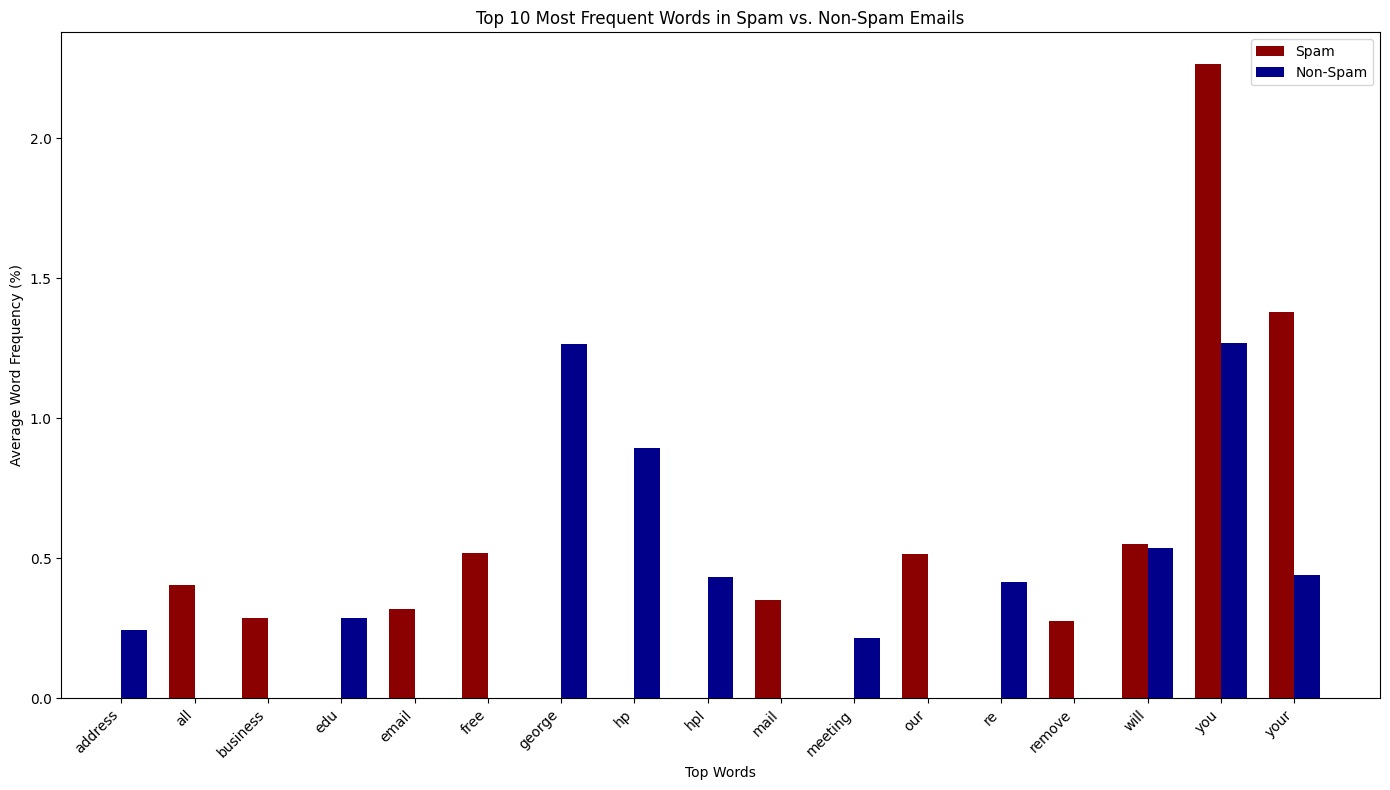

In [6]:
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = np.arange(len(top_words_df))

plt.bar(index, top_words_df['Spam'], bar_width, label='Spam', color='darkred')
plt.bar(index + bar_width, top_words_df['Non-Spam'], bar_width, label='Non-Spam', color='darkblue')

plt.xlabel('Top Words')
plt.ylabel('Average Word Frequency (%)')
plt.title('Top 10 Most Frequent Words in Spam vs. Non-Spam Emails')
plt.xticks(index + bar_width / 2, top_words_df['Word'].str.replace('word_freq_', ''), rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('../data/images/top_10_word_frequencies_spam_vs_nonspam.png')
plt.show()

C:\Users\gauta\AppData\Local\Temp\ipykernel_3724\3875879935.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Class', y='char_freq_$', palette=['darkblue', 'darkred'])


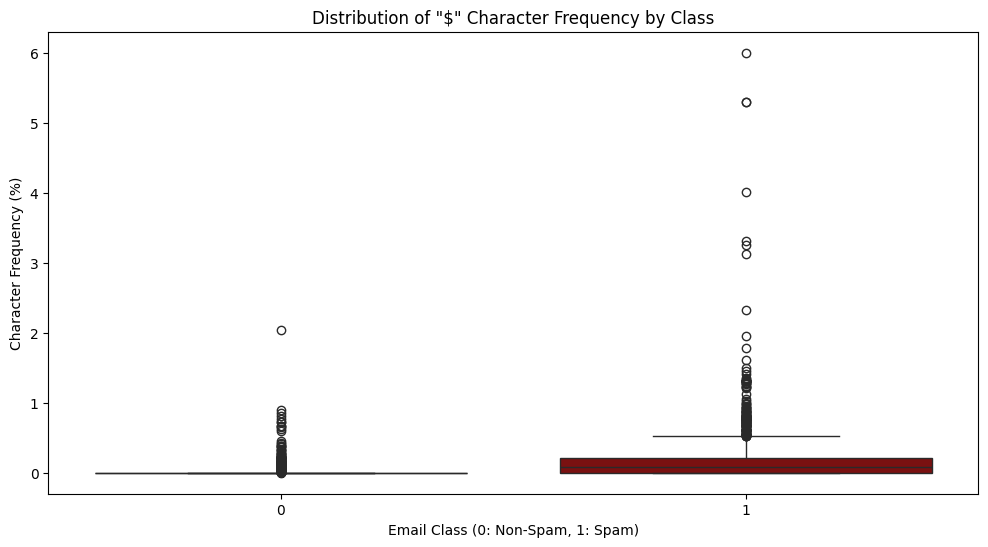

C:\Users\gauta\AppData\Local\Temp\ipykernel_3724\3875879935.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Class', y='char_freq_!', palette=['darkblue', 'darkred'])


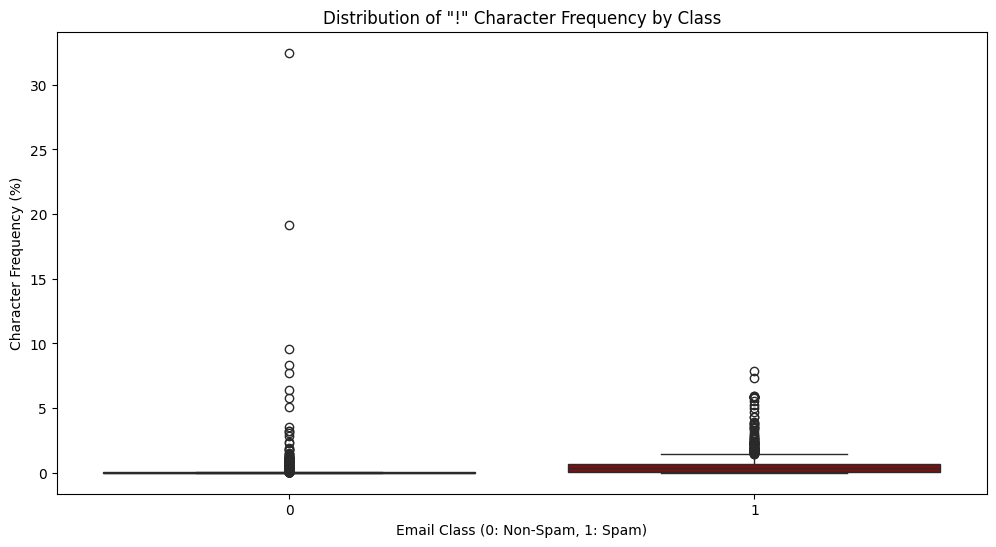

In [7]:
char_freq_cols = [col for col in data.columns if 'char_freq' in col]

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Class', y='char_freq_$', palette=['darkblue', 'darkred'])
plt.title('Distribution of "$" Character Frequency by Class')
plt.xlabel('Email Class (0: Non-Spam, 1: Spam)')
plt.ylabel('Character Frequency (%)')
plt.savefig('../data/images/dollar_sign_frequency_distribution.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Class', y='char_freq_!', palette=['darkblue', 'darkred'])
plt.title('Distribution of "!" Character Frequency by Class')
plt.xlabel('Email Class (0: Non-Spam, 1: Spam)')
plt.ylabel('Character Frequency (%)')
plt.savefig('../data/images/exclamation_mark_frequency_distribution.png')
plt.show()


C:\Users\gauta\AppData\Local\Temp\ipykernel_3724\3453458132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Class', y='capital_run_length_average', palette=['darkblue', 'darkred'])
C:\Users\gauta\AppData\Local\Temp\ipykernel_3724\3453458132.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Class', y='capital_run_length_longest', palette=['darkblue', 'darkred'])
C:\Users\gauta\AppData\Local\Temp\ipykernel_3724\3453458132.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Class', y='capital_ru

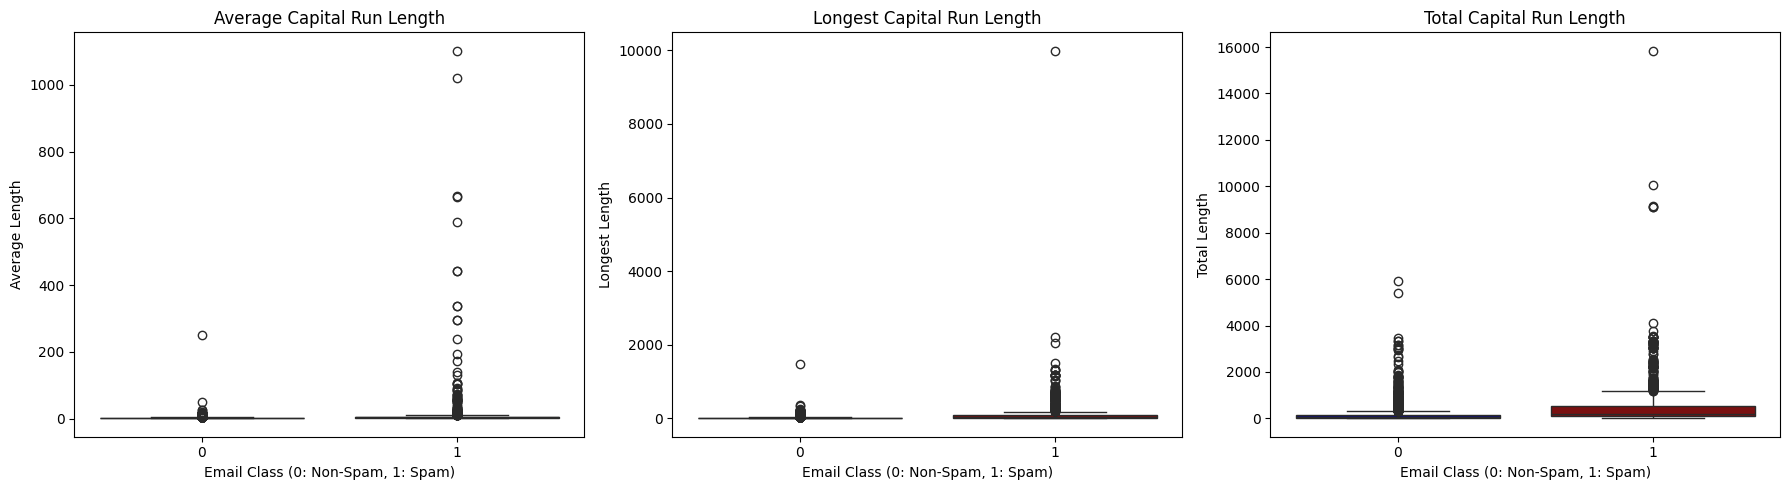

In [8]:
capital_run_cols = ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='Class', y='capital_run_length_average', palette=['darkblue', 'darkred'])
plt.title('Average Capital Run Length')
plt.xlabel('Email Class (0: Non-Spam, 1: Spam)')
plt.ylabel('Average Length')

plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='Class', y='capital_run_length_longest', palette=['darkblue', 'darkred'])
plt.title('Longest Capital Run Length')
plt.xlabel('Email Class (0: Non-Spam, 1: Spam)')
plt.ylabel('Longest Length')

plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='Class', y='capital_run_length_total', palette=['darkblue', 'darkred'])
plt.title('Total Capital Run Length')
plt.xlabel('Email Class (0: Non-Spam, 1: Spam)')
plt.ylabel('Total Length')

plt.tight_layout()
plt.savefig('../data/images/capital_run_length_distributions.png')
plt.show()

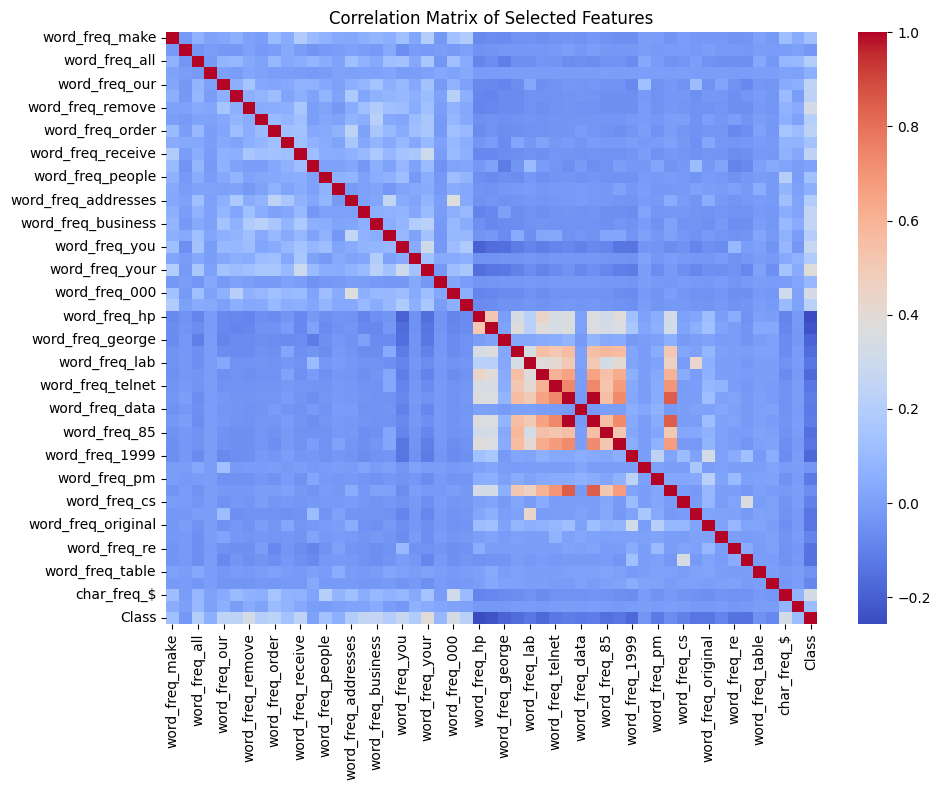

In [9]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[word_freq_cols + ['char_freq_$', 'capital_run_length_average', 'Class']].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.savefig('../data/images/correlation_heatmap.png')
plt.show()

<Figure size 1400x800 with 0 Axes>

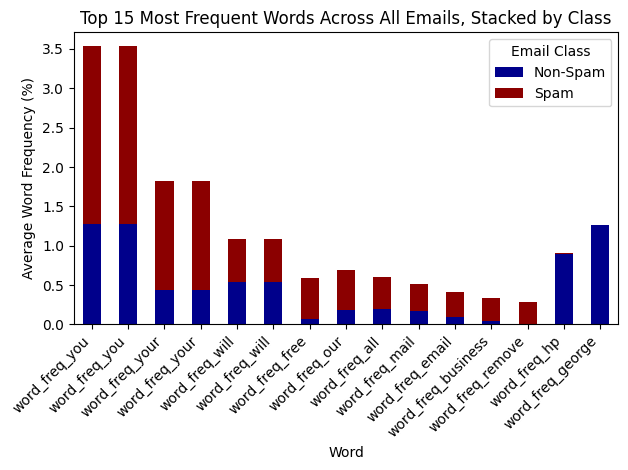

In [10]:
# Calculate the mean word frequency for spam and non-spam emails
spam_word_means = spam_data[word_freq_cols].mean().sort_values(ascending=False).head(10)
non_spam_word_means = non_spam_data[word_freq_cols].mean().sort_values(ascending=False).head(10)

# Combine the top words from both categories
top_words_combined = pd.concat([spam_word_means, non_spam_word_means]).drop_duplicates().head(15).index.tolist()

# Prepare data for plotting
combined_df = data[top_words_combined + ['Class']].groupby('Class').mean().T.rename(columns={0: 'Non-Spam', 1: 'Spam'})
combined_df = combined_df.sort_values(by='Spam', ascending=False)
combined_df['Word'] = combined_df.index.str.replace('word_freq_', '')

plt.figure(figsize=(14, 8))
combined_df[['Non-Spam', 'Spam']].plot(kind='bar', stacked=True, color=['darkblue', 'darkred'])
plt.title('Top 15 Most Frequent Words Across All Emails, Stacked by Class')
plt.xlabel('Word')
plt.ylabel('Average Word Frequency (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Email Class')
plt.tight_layout()
plt.savefig('../data/images/stacked_word_frequencies.png')
plt.show()

In [11]:

corr_matrix = data.corr()
corr_with_target = corr_matrix['Class'].sort_values(ascending=False)
print("Top 10 features most correlated with Spam:\n")
print(corr_with_target.head(11)) 

Top 10 features most correlated with Spam:

Class                       1.000000
word_freq_your              0.383234
word_freq_000               0.334787
word_freq_remove            0.332117
char_freq_$                 0.323629
word_freq_you               0.273651
word_freq_free              0.263215
word_freq_business          0.263204
capital_run_length_total    0.249164
word_freq_our               0.241920
char_freq_!                 0.241888
Name: Class, dtype: float64


In [12]:
from sklearn.preprocessing import StandardScaler
import os
X = data.drop('Class', axis=1)
y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

processed_data_path = '../data/processed/'
if not os.path.exists(processed_data_path):
    os.makedirs(processed_data_path)

X_scaled_df.to_csv(os.path.join(processed_data_path, 'scaled_features.csv'), index=False)
y.to_csv(os.path.join(processed_data_path, 'targets.csv'), index=False)

print("Scaled data saved to ../data/processed/")
X_scaled_df.head()

Scaled data saved to ../data/processed/


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222


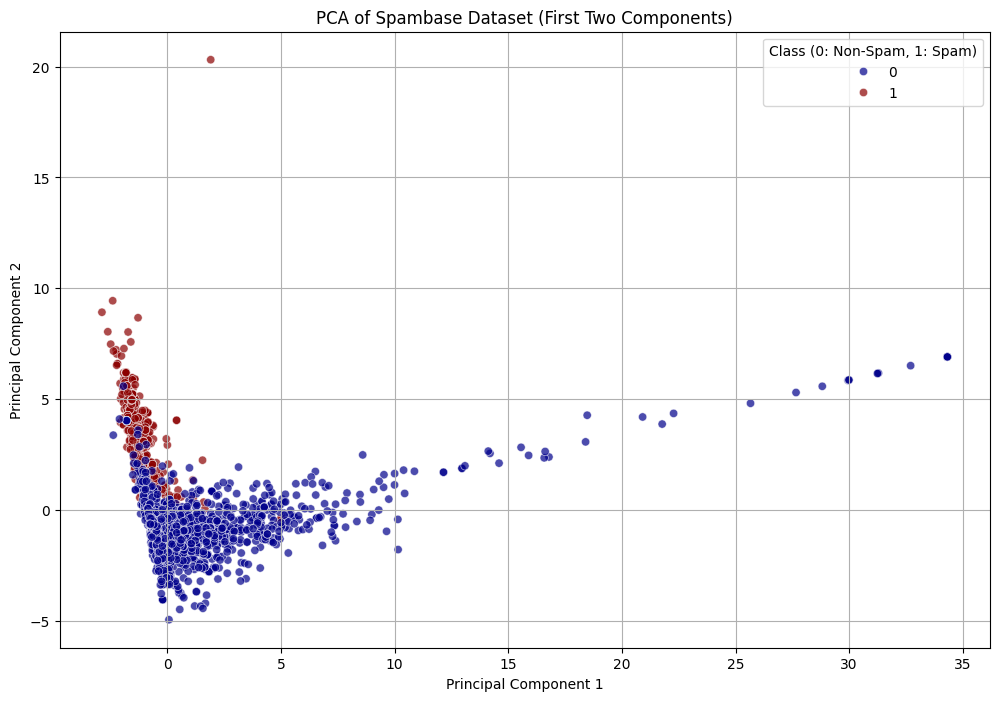

PCA-transformed data saved to ../data/processed/


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) 
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y.values 

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette=['darkblue', 'darkred'], alpha=0.7)
plt.title('PCA of Spambase Dataset (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class (0: Non-Spam, 1: Spam)')
plt.grid(True)
plt.savefig('../data/images/pca_2_components.png')
plt.show()

pca_df.to_csv(os.path.join(processed_data_path, 'pca_features.csv'), index=False)
print("PCA-transformed data saved to ../data/processed/")